### Question #02 (a)

In [3]:
import numpy as np # mathematical calculations
import pandas as pd # data processing
import seaborn as sn # data visualization of statistics (based on matplot)
import matplotlib.pyplot as plt # data visualization (dataframes and arrays)
from sklearn.model_selection import train_test_split # used for spliting data in training(80%) and testing(20%) samples
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, mean_squared_error, r2_score, classification_report
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import SGD
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline 
# With this backend the output of plotting commands is displayed inline

In [4]:
data = pd.read_csv("diabetes.csv") #reading data

In [5]:
# check if any null value is present
data.isnull().values.any()

False

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

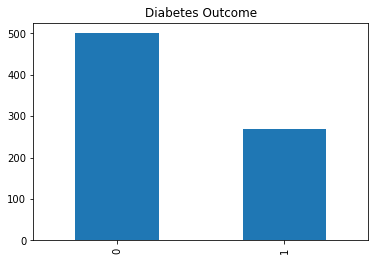

In [6]:
# '0'= no diabetes; '1'= diabetes
print(data.Outcome.value_counts())
data['Outcome'].value_counts().plot(kind='bar').set_title('Diabetes Outcome')

<AxesSubplot:xlabel='Outcome', ylabel='count'>

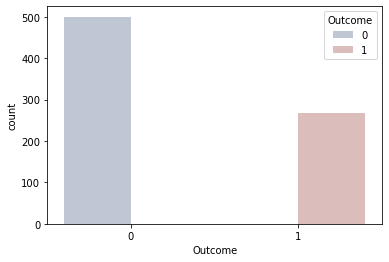

In [7]:
sn.countplot(x='Outcome',hue='Outcome',data=data,palette='vlag') #displaying the exact counts for outcomes

In [8]:
# proportion of diabetes patients (about 35% having diabetes)
data.Outcome.value_counts()[1] / data.Outcome.count()

0.3489583333333333

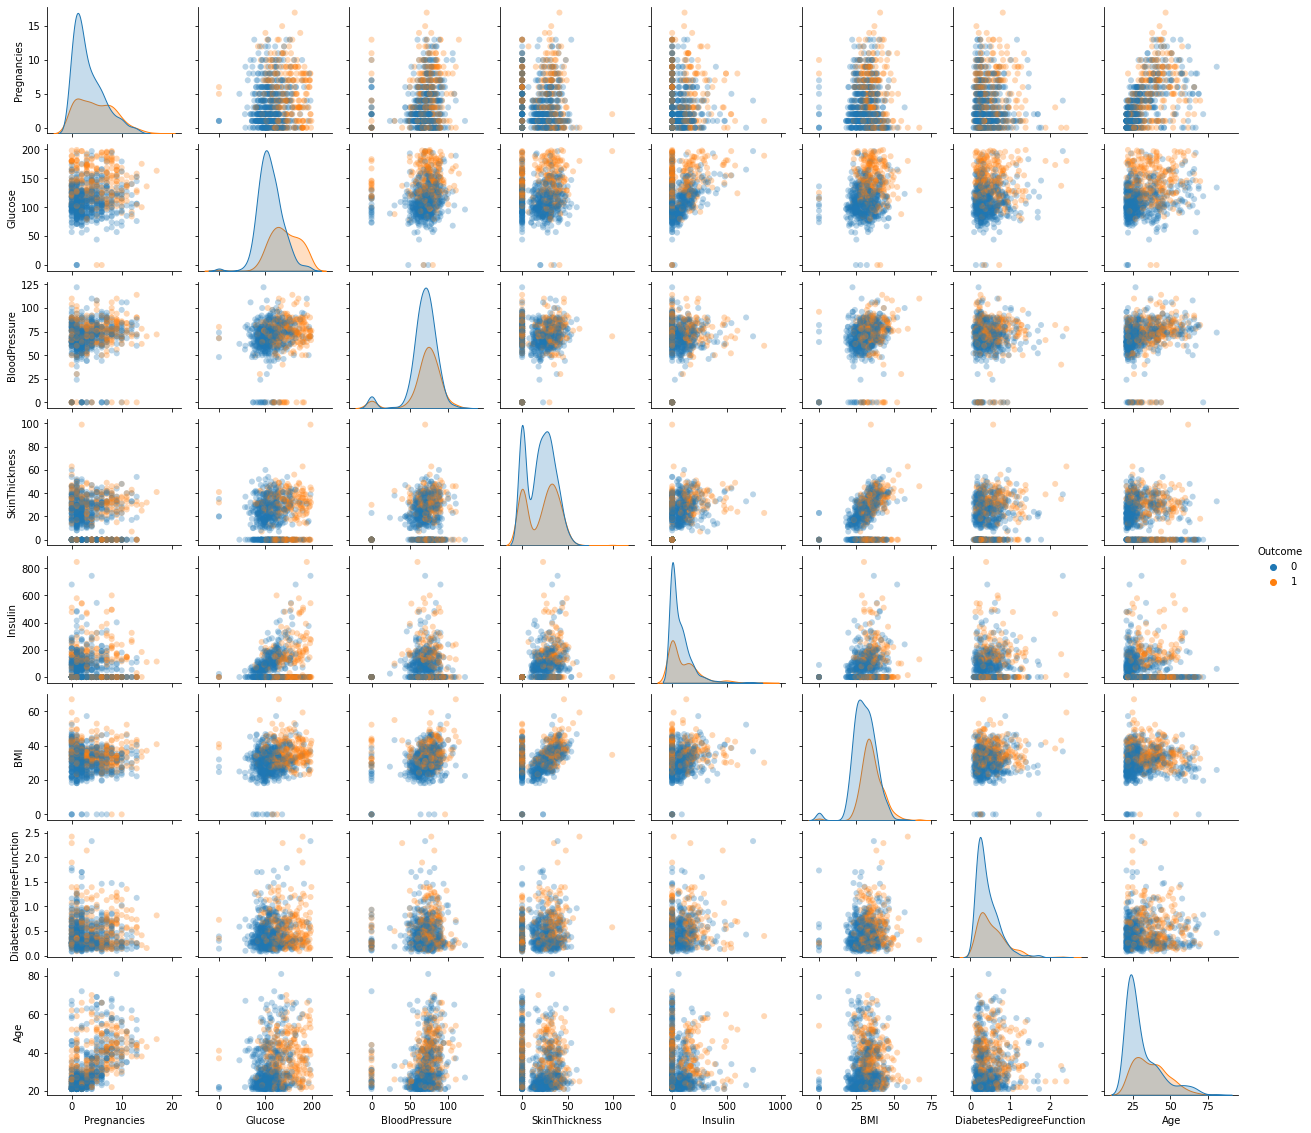

In [9]:
# to visualise pair plot
sn.pairplot(data, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

In [55]:
X=data.drop(["Outcome"], axis=1)
y=data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)
'''
x_train This includes all independent variables here test size is 20 it means remaining 80% for training
x_test This is remaining 20% portion of the independent variables from the data which will not be used in the training phase
y_train This is dependent variable which needs to be predicted by this model 
y_test these labels will be used to test the accuracy between actual and predicted values
'''

log_model=LogisticRegression(max_iter=1500)
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[78, 21],
       [18, 37]], dtype=int64)

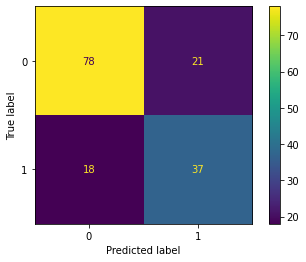

In [56]:
plot_confusion_matrix(log_model,X_test,y_test)

In [12]:
print(classification_report(y_test, y_pred))
#Here is we may look at recall on 1 which represents TRUE - POSITIVE (37/(37+18)) = 0.67
# we estimated 115 real patients out of 268 patients as having diabetes positive.
#Accurcy may provide us performance information of our data set.
#F1 score is also important which is harmanic mean of prediction and recall 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### Question #02 (b)

In [94]:
X=data.drop(["Outcome"], axis=1)
y=data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="log", learning_rate='optimal' ,penalty="l2", max_iter=1500)
clf.fit(X, y)
SGDClassifier(max_iter=1500)

SGDClassifier(max_iter=1500)

In [95]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[33, 68],
       [11, 42]], dtype=int64)

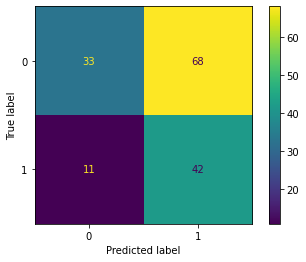

In [96]:
plot_confusion_matrix(clf,X_test,y_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        99
           1       0.36      1.00      0.53        55

    accuracy                           0.36       154
   macro avg       0.68      0.51      0.27       154
weighted avg       0.77      0.36      0.20       154



### Question #02 (c)

In [13]:
#standardization
from sklearn.preprocessing import StandardScaler
scale_x = StandardScaler()
X = scale_x.fit_transform(data.drop(["Outcome"],axis = 1),)
X = pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [14]:
from sklearn.model_selection import train_test_split
y = data.Outcome
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=20,random_state=42, stratify=y)

In [15]:
#Data Modelling
from sklearn.neighbors import KNeighborsClassifier

In [16]:
testing_score = []
trainning_score = []

In [17]:
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    trainning_score.append(knn.score(X_train,y_train))
    testing_score.append(knn.score(X_test,y_test))

In [18]:
max_trainning_score = max(trainning_score)
train_scores_ind = [i for i, v in enumerate(trainning_score) if v == max_trainning_score]
print('Max training score {} % and k = {}'.format(max_trainning_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max training score 100.0 % and k = [1]


In [19]:
max_testing_score = max(testing_score)
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]
print('Max testing score {} % and k = {}'.format(max_testing_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max testing score 75.0 % and k = [3, 11, 12, 13, 14]


In [20]:
plt.figure(figsize=(12,5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

In [21]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)


0.75

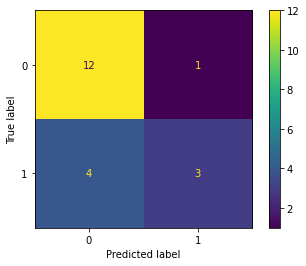

In [22]:
plot_confusion_matrix(knn,X_test,y_test)

In [24]:
y_pred=knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.92      0.83        13
           1       0.75      0.43      0.55         7

    accuracy                           0.75        20
   macro avg       0.75      0.68      0.69        20
weighted avg       0.75      0.75      0.73        20



### Question #02 (d)

In [69]:
X=data.drop(["Outcome"], axis=1)
y=data["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.90,random_state=42)

In [74]:
from sklearn.linear_model import SGDClassifier
X = data.drop(["Outcome"], axis=1)
y = data["Outcome"]
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
clf.fit(X, y)
SGDClassifier(max_iter=10)

C:\Users\KHEEM\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=10)

In [75]:
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[110, 341],
       [ 47, 194]], dtype=int64)

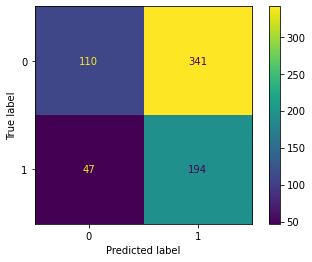

In [76]:
plot_confusion_matrix(clf,X_test,y_test)

In [77]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.24      0.36       451
           1       0.36      0.80      0.50       241

    accuracy                           0.44       692
   macro avg       0.53      0.52      0.43       692
weighted avg       0.58      0.44      0.41       692

